In [3]:

import pyscreenshot as ImageCapture
import time
images_folder="HAND/captured_images/0/"
for i in range(0,100):
    time.sleep(6)
    im=ImageCapture.grab(bbox=(60,170,400,550))
    print("Saved.......",i)
    im.save(images_folder+str(i)+'.png')
    print("Clear screen now and redraw now ........")



Saved....... 50
Clear screen now and redraw now ........
Saved....... 51
Clear screen now and redraw now ........


KeyboardInterrupt: 

In [4]:
import cv2
import csv
import glob

header=["label"]
for i in range(0,784):
    header.append("Pixel"+str(i))
with open('dataset.csv','a') as f:
    writer=csv.writer(f)
    writer.writerow(header)

for label in range(36):

    label_folder=""
    if label<10:
        label_folder=str(label)
    else:
         label_folder=chr(label+55)
    
    dirList=glob.glob("HAND/captured_images/"+label_folder+"/*.png")
    
    for img_path in dirList:
        im=cv2.imread(img_path)
        im_gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        im_gray=cv2.GaussianBlur(im_gray,(15,15),0)
        roi=cv2.resize(im_gray,(28,28),interpolation=cv2.INTER_AREA)
        
        
        data=[]
        if label<10:
            data.append(str(label))
        else:
             data.append(chr(label+55))
        rows,cols=roi.shape
        
        for i in range(rows):
            for j in range(cols):
                k=roi[i,j]
                if k>100:
                    k=1
                else:
                    k=0
                data.append(k)
        with open('dataset.csv','a') as f:
            writer=csv.writer(f)
            writer.writerow(data)

In [5]:
import pandas as pd
from sklearn.utils import shuffle
data=pd.read_csv('HAND/dataset.csv')
data=shuffle(data)
data

,label,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,...,Pixel774,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783
2760,R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1453,E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2534,P,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3178,V,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2211,M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,S,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1462,E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
447,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1203,C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X=data.drop(["label"],axis=1)
Y=data["label"]

E


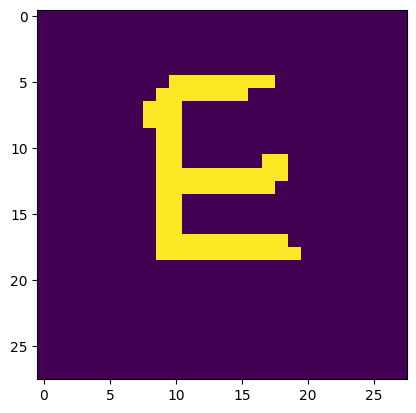

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx=1462
img=X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

In [8]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2)

In [9]:
import joblib
from sklearn.svm import SVC
classifier=SVC(kernel="linear",random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier,"HAND/model/character_recognizer")

['HAND/model/character_recognizer']

In [10]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction,test_y))

Accuracy=  0.9625


In [12]:
import tkinter as tk
from PIL import ImageTk, Image
import cv2
import joblib
import warnings
import pyscreenshot as ImageCapture
warnings.filterwarnings("ignore")

model = joblib.load("HAND/model/character_recognizer")

root = tk.Tk()
root.title("Handwritten Character Recognition")
root.geometry("500x450")

canvas = tk.Canvas(root, width=340, height=330)
canvas.pack()

prediction_frame = tk.Frame(root, bg="#E8E8E8", bd=2, relief=tk.SUNKEN, padx=10, pady=5)
prediction_frame.pack()

prediction_label = tk.Label(
    prediction_frame,
    text="Prediction: ",
    font=("Arial", 18, "bold"),
    fg="black",
    bg="#E8E8E8",
)
prediction_label.pack()

def recognize_character():
    img = ImageCapture.grab(bbox=(60, 170, 400, 500))
    img.save("HAND/img/img.png")

    im = cv2.imread("HAND/img/img.png")
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)

    ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28, 28), interpolation=cv2.INTER_AREA)

    rows, cols = roi.shape
    X = []

    for i in range(rows):
        for j in range(cols):
            k = roi[i, j]
            if k > 100:
                k = 1
            else:
                k = 0
            X.append(k)
#predict is used to maked predictions on X from SVM Trained model
    predictions = model.predict([X])
    predicted_character = str(predictions[0])

    image = ImageTk.PhotoImage(Image.open("HAND/img/img.png"))
    canvas.create_image(0, 0, anchor=tk.NW, image=image)
    canvas.image = image

    prediction_label.config(text="Prediction: " + predicted_character)

button = tk.Button(root, text="Recognize Character", command=recognize_character)
button.pack()

root.mainloop()
